In [51]:
## For context, see README.md, or watch https://www.youtube.com/watch?v=k2ixp5VozIs

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display 
from scipy.stats import mode


def sal_normal(ls_list,pos, NRB_rules=False):
    '''
    Simulates a single throw in the game of Snakes and Ladders.

    input:
    pos (int): current position on the board (0-100)
    revers (bool): if True, reverses the direction of the ladder

    output:
    pos (int): new position after the throw, adjusted for snakes and ladders
    throw (int): the number rolled on the die (1-6)
    '''
    ladder_begin_list, ladder_end_list, snake_begin_list, snake_end_list = ls_list
    shot=0
    if pos in ladder_begin_list:
        pos = ladder_end_list[ladder_begin_list.index(pos)]
        if NRB_rules:
            shot = 1
    elif pos in snake_begin_list:
        pos = snake_end_list[snake_begin_list.index(pos)]
        if NRB_rules:
            shot = 1
    if pos > 100:
        pos = 200 - pos
    throw = np.random.randint(1,7)
    pos +=  throw
    return pos, throw, shot

def position_to_coordinates(position):
    '''
    Converts a position on the Snakes and Ladders board to x, y coordinates for plotting.

    input:
    position (int): position on the board (1-100)

    output:
    (float, float): x and y coordinates for the center of the grid cell
    '''
    row = (position - 1) // 10
    col = (position - 1) % 10 if row % 2 == 0 else 9 - (position - 1) % 10
    return col + 0.5, row + 0.5

def draw_snakes_and_ladders(ls_list, ax):
    '''
    Draws the snakes and ladders on the Snakes and Ladders board.

    inputs:
    ax (matplotlib.axes.Axes): the axes on which to draw the snakes and ladders
    reverse (bool): if True, reverses the direction of the ladders
    '''
    ladder_begin_list, ladder_end_list, snake_begin_list, snake_end_list = ls_list

    for start, end in zip(ladder_begin_list, ladder_end_list):
        start_x, start_y = position_to_coordinates(start)
        end_x, end_y = position_to_coordinates(end)
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                 head_width=0.3, head_length=0.3, fc='green', ec='green', length_includes_head=True)

    for start, end in zip(snake_begin_list, snake_end_list):
        start_x, start_y = position_to_coordinates(start)
        end_x, end_y = position_to_coordinates(end)
        ax.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
                 head_width=0.3, head_length=0.3, fc='red', ec='red', length_includes_head=True)

def play_game(NRB_rules=False, NRB_board=False, verbose=False,):
    '''
    Plays a game of Snakes and Ladders until reaching the end (position 100).

    input:
    NRB_rules (bool): if True, uses the No Rules Barred rules, which turns all ladders into snakes
    NRB_board (bool): if True, uses the board in the NRB video, instead of my childhood board
    verbose (bool): if True, displays the game state after each throw

    output:
    int: number of throws taken to reach position 100
    '''
    pos = 0
    i = 0
    tot_shot = 0
    while pos != 100:
        i += 1
        if NRB_rules and NRB_board:
            ls_list = [[14, 31, 38, 84, 59, 67, 81, 91],
                       [4, 9, 20, 28, 40, 51, 63, 71],
                       [99, 95, 93, 87, 64, 62, 54, 17],
                       [78, 75, 73, 24, 60, 19, 34, 7]]  
                  
            
        elif not NRB_rules and NRB_board:
            ls_list = [[4, 9, 20, 28, 40, 51, 63, 71],
                       [14, 31, 38, 84, 59, 67, 81, 91],
                       [99, 95, 93, 87, 64, 62, 54, 17],
                       [78, 75, 73, 24, 60, 19, 34, 7]]
            
        elif NRB_rules and not NRB_board:
            ls_list = [[91, 98, 86, 78, 76, 71, 67, 37, 35, 28, 20],
                       [88, 81, 73, 61, 57, 52, 49, 22, 16, 11, 3],
                       [99, 97, 92, 90, 85, 83, 75, 60, 56, 54, 51, 39, 26], 
                       [63, 66, 25, 48, 59, 45, 13, 23, 1, 36, 6, 5, 10]]

        else:
            ls_list = [[3, 11, 16, 22, 49, 52, 57, 61, 73, 81, 88], 
                       [20, 28, 35, 37, 67, 71, 76, 78, 86, 98, 91],
                       [99, 97, 92, 90, 85, 83, 75, 60, 56, 54, 51, 39, 26], 
                       [63, 66, 25, 48, 59, 45, 13, 23, 1, 36, 6, 5, 10]]

        
        pos, throw, shot = sal_normal(ls_list, pos, NRB_rules=NRB_rules)
        tot_shot += shot
        if verbose:
            time.sleep(0.5)
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.title(f'At throw {i}, position is {pos}. Threw a {throw}')
                        
            ax.set_xlim(0, 10)
            ax.set_ylim(0, 10)

            # Draw grid
            for x in range(11):
                ax.axhline(y=x, color='black', linewidth=0.5)
                ax.axvline(x=x, color='black', linewidth=0.5)

            # Draw snakes and ladders
            draw_snakes_and_ladders(ls_list, ax)

            # Plot the red dot
            ex, why = position_to_coordinates(pos)
            ax.plot(ex, why, 'ro', color='tab:orange', markersize=10)  # Adjusted to center the dot in the grid cell

            # Set aspect ratio and labels
            ax.set_aspect('equal')
            ax.set_xticks(range(11))
            ax.set_yticks(range(11))
            ax.grid(False)  # Disable default grid
            plt.show()
            display.clear_output(wait=True)
                        
    return i, tot_shot

nr_of_games = 1000000

throws_list = np.zeros(nr_of_games, dtype=int)
shots_list = np.zeros(nr_of_games, dtype=int)
NRB_rules = True
NRB_board = True

for i in range(nr_of_games):
    throws, shots = play_game(NRB_rules=NRB_rules, NRB_board=NRB_board, verbose=False)
    throws_list[i] = throws
    shots_list[i] = shots

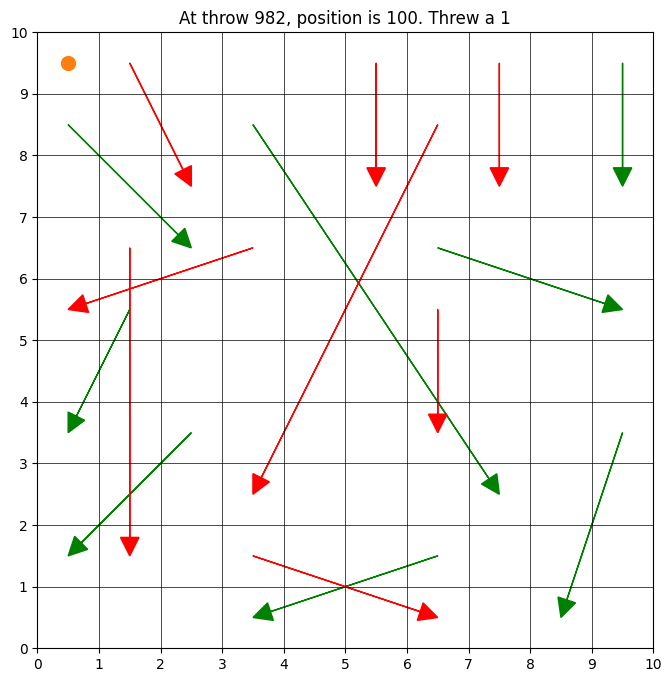

In [52]:
throws_you, shots_you = play_game(NRB_rules=NRB_rules, NRB_board=NRB_board, verbose=True)

You had 982 throws in your game, which is more than 85.5% of the games played.
Min: 20, Max: 6228, Mean: 524.14, Median: 374.00, Mode: 50


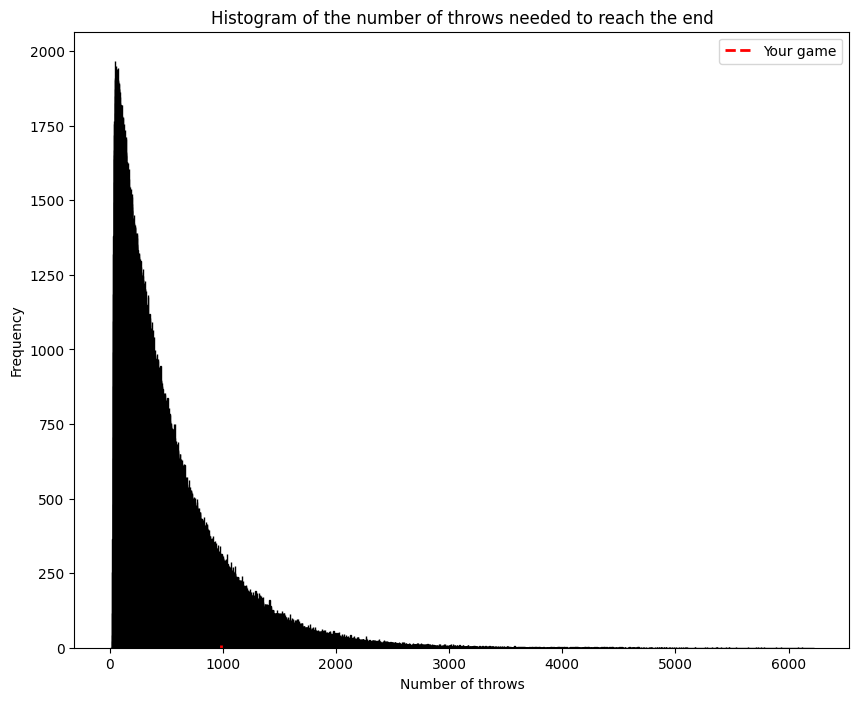

You had 151 shots in your game, which is more than 85.6% of the games played.
Min: 0, Max: 993, Mean: 78.52, Median: 55.00, Mode: 8


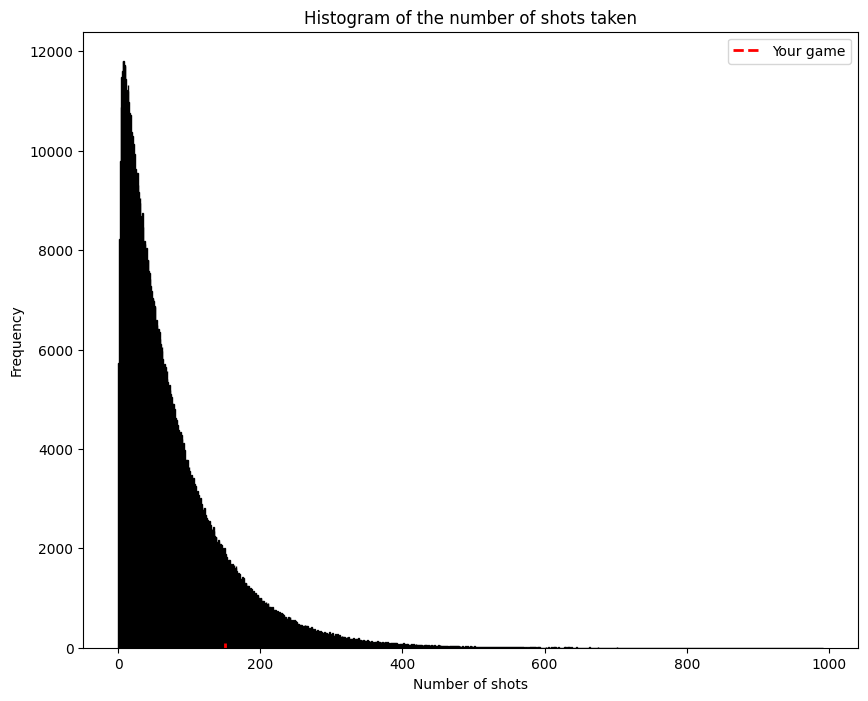

In [53]:

print(f'You had {throws_you} throws in your game, which is more than {throws_list[throws_list < throws_you].size/(nr_of_games)*100:.1f}% of the games played.')

fig, ax = plt.subplots(figsize=(10, 8))
print(f'Min: {throws_list.min()}, Max: {throws_list.max()}, Mean: {throws_list.mean():.2f}, Median: {np.median(throws_list):.2f}, Mode: {mode(throws_list, keepdims=True).mode[0]}')
ax.hist(throws_list, bins=range(1, max(throws_list)), color='tab:blue', edgecolor='black', align='left')
ax.vlines(x=throws_you, ymin=0, ymax=10, color='red', linestyle='dashed', linewidth=2, label='Your game')
ax.set_xlabel('Number of throws')
ax.set_ylabel('Frequency')
ax.set_title(f'Histogram of the number of throws needed to reach the end')
plt.legend()
plt.show()


if NRB_rules:
    print(f'You had {shots_you} shots in your game, which is more than {shots_list[shots_list < shots_you].size/(nr_of_games)*100:.1f}% of the games played.')
    print(f'Min: {shots_list.min()}, Max: {shots_list.max()}, Mean: {shots_list.mean():.2f}, Median: {np.median(shots_list):.2f}, Mode: {mode(shots_list, keepdims=True).mode[0]}')
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.hist(shots_list, bins=range(1, max(shots_list)), color='tab:blue', edgecolor='black', align='left')
    ax.vlines(x=shots_you, ymin=0, ymax=100, color='red', linestyle='dashed', linewidth=2, label='Your game')
    ax.set_xlabel('Number of shots')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of the number of shots taken')
    plt.legend()
    plt.show()